# Лабораторная 1
### Степановский Михаил, Лопатин Михаил




### Задание 1: Реализуем методы нахождения производной при фиксированном значении шага:
$f(x)' \simeq \dfrac{f(x+h)-f(x)}{h}$ - правая разностная производна. В коде это функция right_deriv
$f(x)' \simeq \dfrac{f(x)-f(x-h)}{h}$ - левая разностная производна. В коде это функция left_deriv
$f(x)' \simeq \dfrac{f(x_{i+1})-f(x_{i-1})}{2h}$ - центральная разностная производная. В коде это функция central_deriv


In [1]:
import numpy as np


def right_deriv(f, x_values, step):
    return [(f(x + step) - f(x)) / step for x in x_values]


def left_deriv(f, x_values, step):
    return [(f(x) - f(x - step)) / step for x in x_values]


def central_deriv(f, x_values, step):
    ans = [(-3 * f(x_values[0]) + (4 * f(x_values[1])) - f(x_values[2])) / (2 * step)]
    for x in x_values[1:-1]:
        ans.append((f(x) - f(x - step)) / step)
    ans.append((f(x_values[-3]) - (4 * f(x_values[-2])) + (3 * f(x_values[-1]))) / (2 * step))
    return ans

### Задача 2: Возьмём две функции $f(x)=x^2$ и $g(x)=x^3$. Построим графики их аналитически выведенной производной, а также вычиленных значений численной производной в узлах сетки.
$f(x)'=2x
 \\
 g(x)'=3x^2$

In [2]:
def cube_func(x):
    return x ** 3


def sqr_func(x):
    return x ** 2


def cube_deriv(x):
    return 3 * (x ** 2)


def sqr_derivative(x):
    return 2 * x

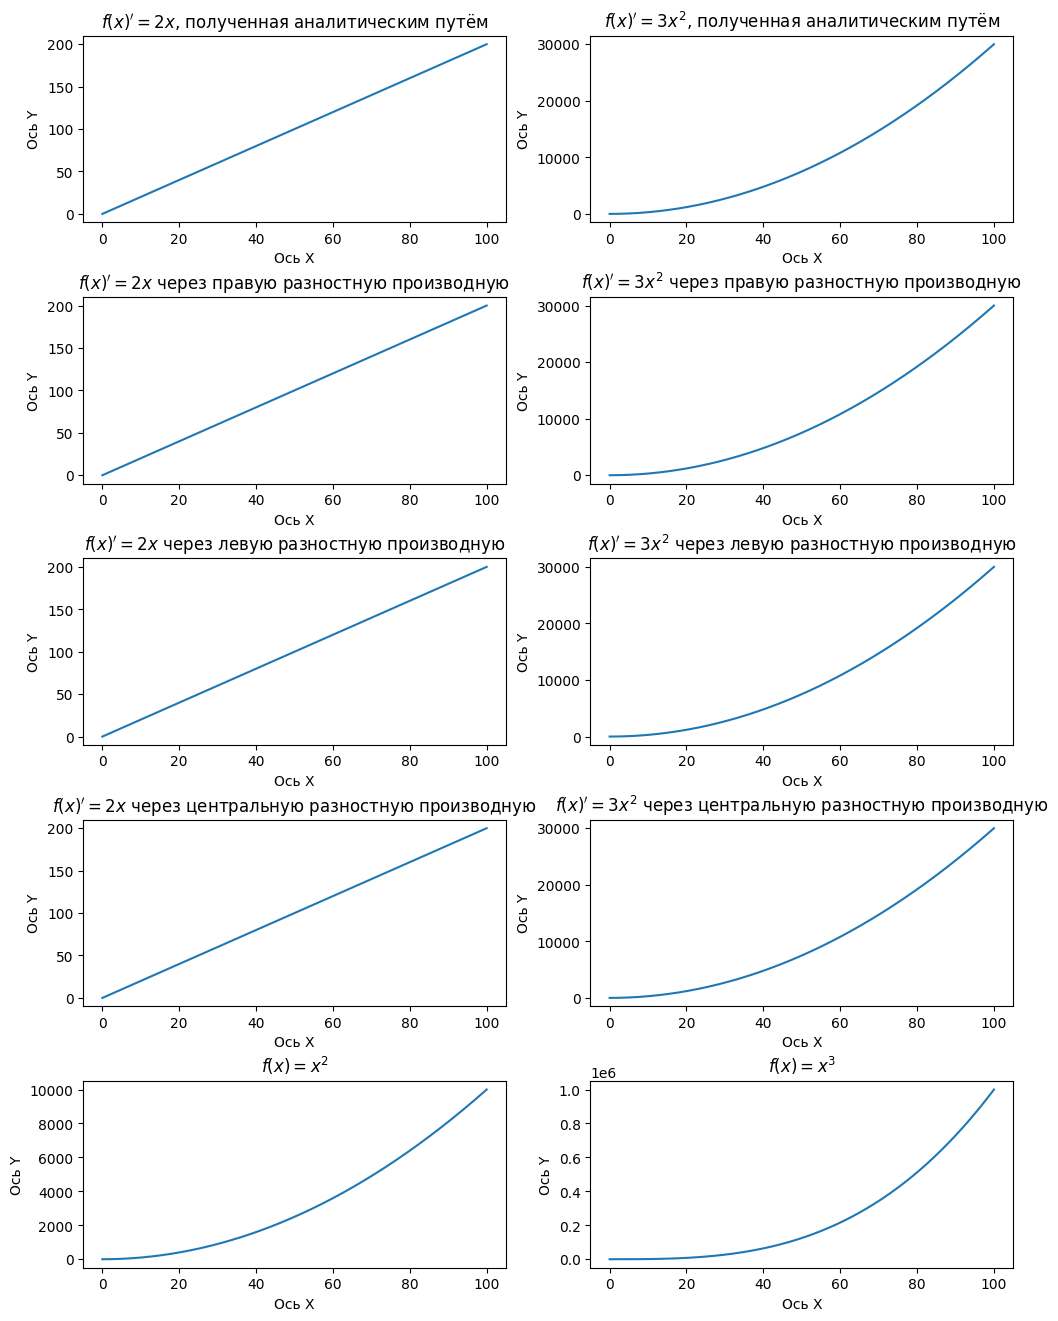

In [3]:
import matplotlib.pyplot as plt

h = 0.01
a = 0
b = 100
n = round((b - a) / h)
x_line = np.linspace(a, b, n)

fig, axs = plt.subplots(5, 2)
fig.set_figheight(16)
fig.set_figwidth(12)
fig.subplots_adjust(hspace=0.4)

axs[0][0].plot(x_line, sqr_derivative(x_line))
axs[0][0].set_title(r"$f(x)'=2x$, полученная аналитическим путём")

axs[1][0].plot(x_line, right_deriv(sqr_func, x_line, h))
axs[1][0].set_title(r"$f(x)'=2x$ через правую разностную производную")

axs[2][0].plot(x_line, left_deriv(sqr_func, x_line, h))
axs[2][0].set_title(r"$f(x)'=2x$ через левую разностную производную")

axs[3][0].plot(x_line, central_deriv(sqr_func, x_line, h))
axs[3][0].set_title(r"$f(x)'=2x$ через центральную разностную производную")

axs[0][1].plot(x_line, cube_deriv(x_line))
axs[0][1].set_title(r"$f(x)'=3x^2$, полученная аналитическим путём")

axs[1][1].plot(x_line, right_deriv(cube_func, x_line, h))
axs[1][1].set_title(r"$f(x)'=3x^2$ через правую разностную производную")

axs[2][1].plot(x_line, left_deriv(cube_func, x_line, h))
axs[2][1].set_title(r"$f(x)'=3x^2$ через левую разностную производную")

axs[3][1].plot(x_line, central_deriv(cube_func, x_line, h))
axs[3][1].set_title(r"$f(x)'=3x^2$ через центральную разностную производную")

axs[4][0].plot(x_line, sqr_func(x_line))
axs[4][0].set_title(r"$f(x)=x^2$")

axs[4][1].plot(x_line, cube_func(x_line))
axs[4][1].set_title(r"$f(x)=x^3$")

for ax in axs.flat:
    ax.set_xlabel("Ось X")
    ax.set_ylabel("Ось Y")

plt.show()


### Задача 3: Найдём среднеквадратичную ошибку для проверки точности численных методов взятия производных от функций $f(x)$ и $g(x)$


In [13]:
def RMSE(numerical_values, true_values):
    differences = numerical_values - true_values
    return np.sqrt((differences ** 2).mean())

print(r"RMSE для производных для квадратичной функции:")
print("Правая разностная производная:",
      "{:.6}".format(RMSE(right_deriv(sqr_func, x_line, h), sqr_derivative(x_line))))
print("Левая разностная производная:",
      "{:.6}".format(RMSE(left_deriv(sqr_func, x_line, h), sqr_derivative(x_line))))
print("Центральная разностная производная:",
      "{:.6}".format(RMSE(central_deriv(sqr_func, x_line, h), sqr_derivative(x_line))))


RMSE для производных для квадратичной функции:
Правая разностная производная: 0.01
Левая разностная производная: 0.01
Центральная разностная производная: 0.010001


In [14]:
print(r"RMSE для производных для кубической функции:")
print("Правая разностная производная:",
      "{:.6}".format(RMSE(right_deriv(cube_func, x_line, h), cube_deriv(x_line))))
print("Левая разностная производная:",
      "{:.6}".format(RMSE(left_deriv(cube_func, x_line, h), cube_deriv(x_line))))
print("Центральная разностная производная:",
      "{:.6}".format(RMSE(central_deriv(cube_func, x_line, h), cube_deriv(x_line))))

RMSE для производных для кубической функции:
Правая разностная производная: 1.73218
Левая разностная производная: 1.73201
Центральная разностная производная: 1.73201


### Задача 4: проанализируем зависимость отклонения численного ответа от аналитического в зависимости от шага при уменьшении его в 2, 4, 8 и 16 раз. Построим график зависимости среднеквадратичной ошибки от величины шага.

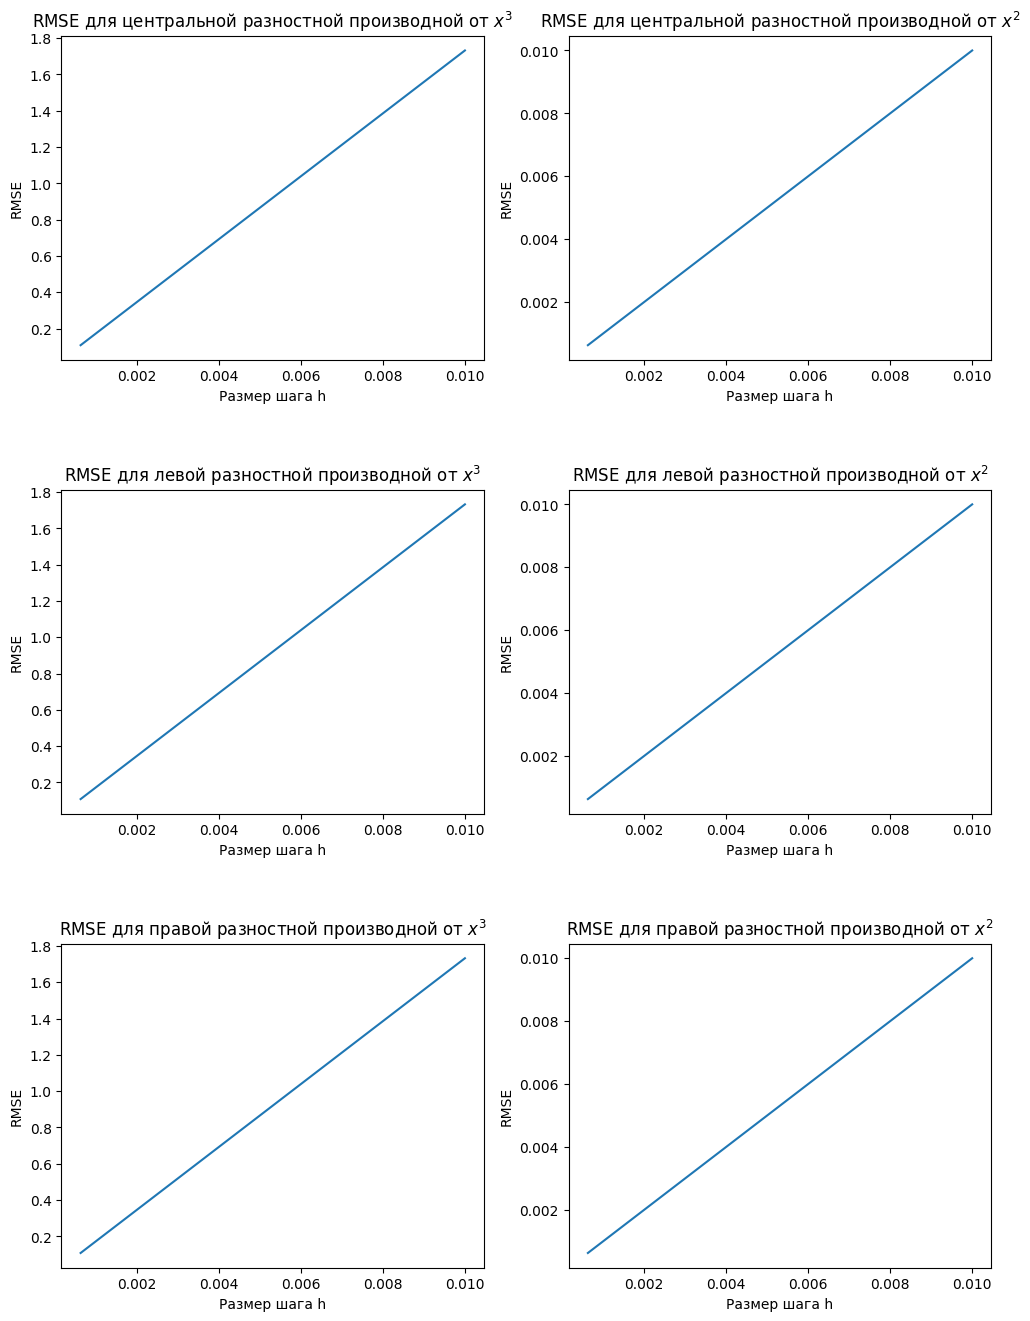

In [6]:
h_values = [h / 2 ** i for i in range(5)]
rmse_central_cube = [RMSE(central_deriv(cube_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                          cube_deriv(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]
rmse_left_cube = [RMSE(left_deriv(cube_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                       cube_deriv(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]
rmse_right_cube = [RMSE(right_deriv(cube_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                        cube_deriv(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]

rmse_central_sqr = [RMSE(central_deriv(sqr_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                         sqr_derivative(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]
rmse_left_sqr = [RMSE(left_deriv(sqr_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                      sqr_derivative(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]
rmse_right_sqr = [RMSE(right_deriv(sqr_func, np.linspace(a, b, round((b - a) / h_s)), h_s),
                       sqr_derivative(np.linspace(a, b, round((b - a) / h_s)))) for h_s in h_values]

fig, axs = plt.subplots(3, 2)
fig.set_figheight(16)
fig.set_figwidth(12)
fig.subplots_adjust(hspace=0.4)

axs[0][0].plot(h_values, rmse_central_cube)
axs[0][0].set_title(r"RMSE для центральной разностной производной от $x^3$")

axs[1][0].plot(h_values, rmse_left_cube)
axs[1][0].set_title(r"RMSE для левой разностной производной от $x^3$")

axs[2][0].plot(h_values, rmse_right_cube)
axs[2][0].set_title(r"RMSE для правой разностной производной от $x^3$")

axs[0][1].plot(h_values, rmse_central_sqr)
axs[0][1].set_title(r"RMSE для центральной разностной производной от $x^2$")

axs[1][1].plot(h_values, rmse_left_sqr)
axs[1][1].set_title(r"RMSE для левой разностной производной от $x^2$")

axs[2][1].plot(h_values, rmse_right_sqr)
axs[2][1].set_title(r"RMSE для правой разностной производной от $x^2$")

for ax in axs.flat:
    ax.set_xlabel("Размер шага h")
    ax.set_ylabel("RMSE")

plt.show()

При увеличении шага среднеквадратичная ошибка растёт линейно, пропорционально. Так что чем меньше шаг, тем выше точность.

### Задание 5: Реализуем методы численного интегрирования
$I \simeq \sum^n_0 h f(x_{i-1})$ - формула левых прямоугольников. Функция в коде: left_rectangles
$I \simeq \sum^n_0 h f(x_i)$ - формула правых прямоугольников. Функция в коде: right_rectangles
$I \simeq \sum^n_0 h f(x_{i-1/2})$ - формула средних прямоугольников. Функция в коде: mid_rectangles
$I \simeq \sum^n_0 \dfrac{h}{2} (f(x_{i-1})+f(x_i))$ - формула трапеций. Функция в коде: trapezoid_integration
$I \simeq \sum^n_0 \dfrac{h}{6} (f(x_{i-1})+4f(x_{i-1/2})+f(x_i))$ - формула Симпсона. Функция в коде: simpson_integration



In [7]:
def mid_rectangles(f, start, end, step):
    step_num = round((end - start) / step)
    x = np.linspace(start, end, step_num)
    return sum([step * f(xi - (step / 2)) for xi in x])


def left_rectangles(f, start, end, step):
    step_num = round((end - start) / step)
    x = np.linspace(start, end, step_num)
    return sum([step * f(xi - step) for xi in x])


def right_rectangles(f, start, end, step):
    step_num = round((end - start) / step)
    x = np.linspace(start, end, step_num)
    return sum([step * f(xi) for xi in x])


def trapezoid_integration(f, start, end, step):
    step_num = round((end - start) / step)
    x = np.linspace(start, end, step_num)
    return sum([(step / 2) * (f(xi - step) + f(xi)) for xi in x])

def simpson_integration(f, start, end, step):
    step_num = round((end - start) / step)
    x = np.linspace(start, end, step_num)
    return sum([(step / 6) * (f(xi - step) + (4 * f(xi + (step/2))) + f(xi)) for xi in x])

### Задание 6: Возьмём две функции, из интереса пусть они будут отличаться от прошлых двух:
### $f(x) = 2x^5$
### $g(x) = 2x+sin(x)$

In [8]:
def f_x(x):
    return 2*(x**5)

def g_x(x):
    return 2*x+np.sin(x)

### Посчитаем интегралы аналитически
### $\int^{100}_0{2x^5dx} = \frac{x^6}{3}\big|_{0}^{100} = \frac{100^6}{3} \approx 3.33 \cdot 10^{11}$
### $\int^{100}_0{2x+sin(x)dx} = x^2-cos(x)\big|_0^{100} = 10001 - cos(100) \approx 10000.137$
### Cравним с численными методами, для начала сравним для $f(x)$:

In [9]:

print("Метод левых прямоугольников:", "{:.6}".format(left_rectangles(f_x, a, b, h)))
print("Метод правых прямоугольников:", "{:.6}".format(right_rectangles(f_x, a, b, h)))
print("Метод средних прямоугольников:", "{:.6}".format(mid_rectangles(f_x, a, b, h)))
print("Формула трапеций:", "{:.6}".format(trapezoid_integration(f_x, a, b, h)))
print("Формула Симпсона", "{:.6}".format(simpson_integration(f_x, a, b, h)))


Метод левых прямоугольников: 3.332e+11
Метод правых прямоугольников: 3.334e+11
Метод средних прямоугольников: 3.333e+11
Формула трапеций: 3.333e+11
Формула Симпсона 3.33433e+11


### Сравним с численными методами, но теперь для $g(x)$:

In [10]:
print("Метод левых прямоугольников:", "{:.6}".format(left_rectangles(g_x, a, b, h)))
print("Метод правых прямоугольников:", "{:.6}".format(right_rectangles(g_x, a, b, h)))
print("Метод средних прямоугольников:", "{:.6}".format(mid_rectangles(g_x, a, b, h)))
print("Формула трапеций:", "{:.6}".format(trapezoid_integration(g_x, a, b, h)))
print("Формула Симпсона", "{:.6}".format(simpson_integration(g_x, a, b, h)))

Метод левых прямоугольников: 9998.14
Метод правых прямоугольников: 10000.1
Метод средних прямоугольников: 9999.14
Формула трапеций: 9999.14
Формула Симпсона 10000.5


### Задание 7: проанализируем зависимость отклонения численного ответа от аналитического в зависимости от шага при уменьшении его в 2, 4, 8 и 16 раз. Построим график зависимости среднеквадратичной ошибки от величины шага.

In [11]:
f_x_ans = (100**6)/3
f_g_ans = 10001 - np.cos(100)

rmse_f_left_integration = [RMSE(left_rectangles(f_x, a, b, h_step), f_x_ans) for h_step in h_values]
rmse_f_right_integration = [RMSE(right_rectangles(f_x, a, b, h_step), f_x_ans) for h_step in h_values]
rmse_f_mid_integration = [RMSE(mid_rectangles(f_x, a, b, h_step), f_x_ans) for h_step in h_values]
rmse_f_trapezoid_integration = [RMSE(trapezoid_integration(f_x, a, b, h_step), f_x_ans) for h_step in h_values]
rmse_f_simpson_integration = [RMSE(simpson_integration(f_x, a, b, h_step), f_x_ans) for h_step in h_values]

rmse_g_left_integration = [RMSE(left_rectangles(g_x, a, b, h_step), f_g_ans) for h_step in h_values]
rmse_g_right_integration = [RMSE(right_rectangles(g_x, a, b, h_step), f_g_ans) for h_step in h_values]
rmse_g_mid_integration = [RMSE(mid_rectangles(g_x, a, b, h_step), f_g_ans) for h_step in h_values]
rmse_g_trapezoid_integration = [RMSE(trapezoid_integration(g_x, a, b, h_step), f_g_ans) for h_step in h_values]
rmse_g_simpson_integration = [RMSE(simpson_integration(g_x, a, b, h_step), f_g_ans) for h_step in h_values]


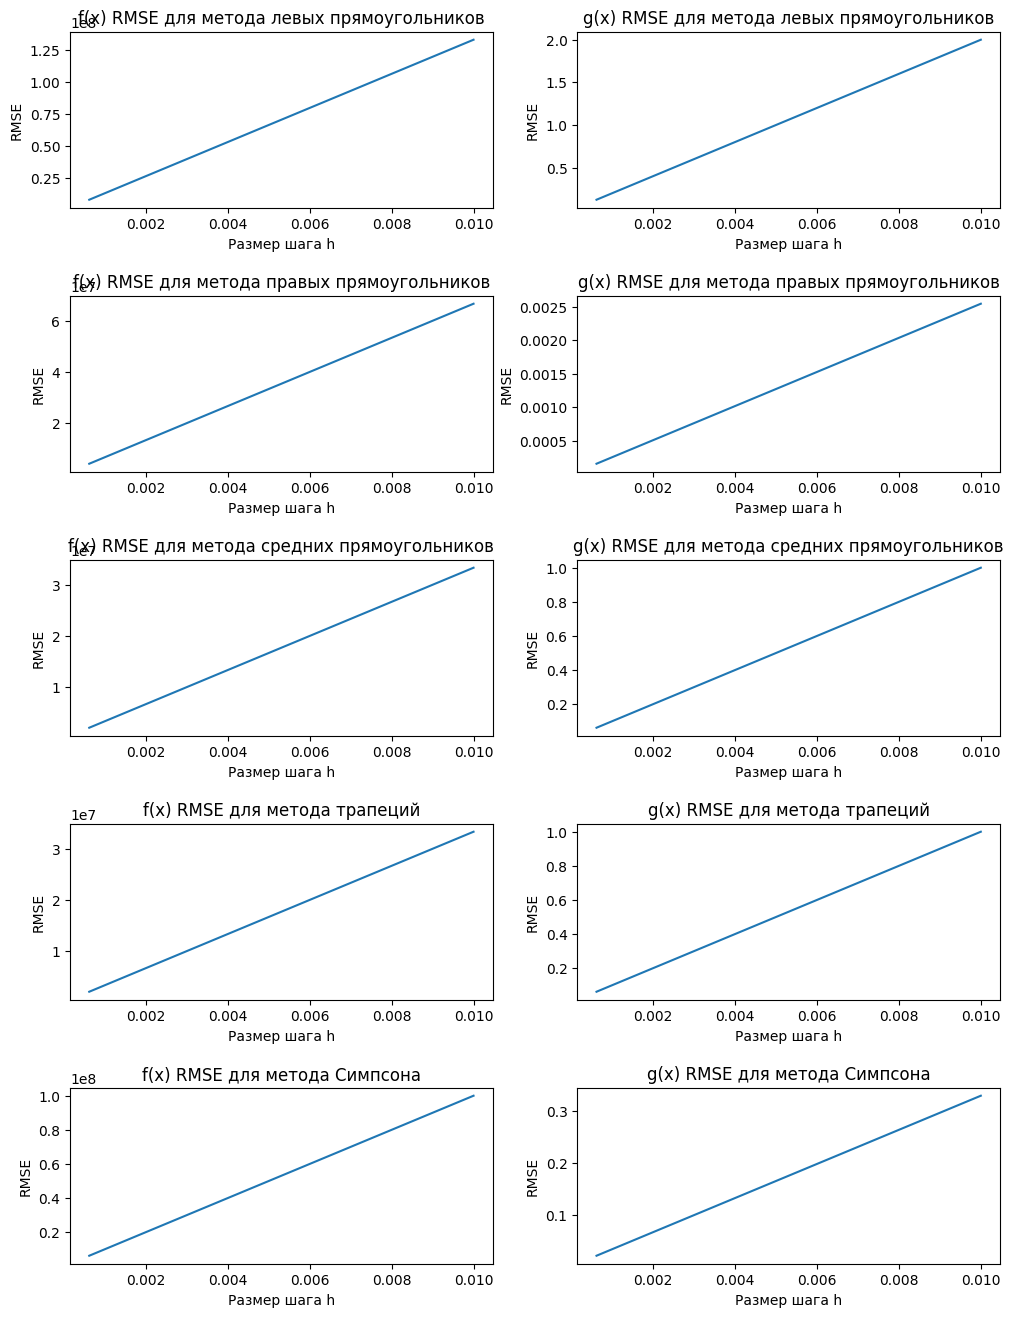

In [12]:
fig, axs = plt.subplots(5, 2)
fig.set_figheight(16)
fig.set_figwidth(12)
fig.subplots_adjust(hspace=0.5)

axs[0][0].plot(h_values, rmse_f_left_integration)
axs[0][0].set_title(r"f(x) RMSE для метода левых прямоугольников")

axs[1][0].plot(h_values, rmse_f_right_integration)
axs[1][0].set_title(r"f(x) RMSE для метода правых прямоугольников")

axs[2][0].plot(h_values, rmse_f_mid_integration)
axs[2][0].set_title(r"f(x) RMSE для метода средних прямоугольников")

axs[3][0].plot(h_values, rmse_f_trapezoid_integration)
axs[3][0].set_title(r"f(x) RMSE для метода трапеций")

axs[4][0].plot(h_values, rmse_f_simpson_integration)
axs[4][0].set_title(r"f(x) RMSE для метода Симпсона")

axs[0][1].plot(h_values, rmse_g_left_integration)
axs[0][1].set_title(r"g(x) RMSE для метода левых прямоугольников")

axs[1][1].plot(h_values, rmse_g_right_integration)
axs[1][1].set_title(r"g(x) RMSE для метода правых прямоугольников")

axs[2][1].plot(h_values, rmse_g_mid_integration)
axs[2][1].set_title(r"g(x) RMSE для метода средних прямоугольников")

axs[3][1].plot(h_values, rmse_g_trapezoid_integration)
axs[3][1].set_title(r"g(x) RMSE для метода трапеций")

axs[4][1].plot(h_values, rmse_g_simpson_integration)
axs[4][1].set_title(r"g(x) RMSE для метода Симпсона")

for ax in axs.flat:
    ax.set_xlabel("Размер шага h")
    ax.set_ylabel("RMSE")

plt.show()

Мы можем видеть ситуацию, аналогичную ситуации с производными. Среднеквадратичная ошибка растёт пропорционально с тем, как растёт величина шага.
Ещё можно заметить, что ошибка сильно зависит от того, какую функцию мы исследуем. Например для $g(x)=2x+sin(x)$ величина шага не сильно повлияла на изменение ошибки, тем временем для $f(x)=2x^5$ при увеличении шага растёт очень сильно.

Вывод: мы реализовали методы численного нахождения производной, благодаря средней квадратичной ошибки сравнили эти методы с аналитическим решением. Получили достаточно точный результат. Изучили и продемонстрировали, как меняется точность численных методов в зависимости от величины шага.
Также мы реализовали методы численного нахождения интеграла. Как и с производной, сравнили ответ с аналитическим решением и посмотрели, как меняется точность в зависимости от величины шага.